In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')
df.tail()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
4596,4597,88,0.0,0.000,0.0,0.0,0.31,n
4597,4598,14,0.0,0.353,0.0,0.0,0.00,n
4598,4599,118,0.0,0.000,0.0,0.0,0.30,n
4599,4600,78,0.0,0.000,0.0,0.0,0.96,n
4600,4601,40,0.0,0.125,0.0,0.0,0.00,n


In [3]:
df['spam'] = df['yesno'].apply(lambda x: 1 if x=='y' else 0)

In [4]:
df[['yesno','spam']].value_counts()

yesno  spam
n      0       2788
y      1       1813
dtype: int64

In [5]:
df = df.drop([df.columns[0],'yesno'], axis=1)

In [6]:
df

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0
4597,14,0.000,0.353,0.00,0.00,0.00,0
4598,118,0.000,0.000,0.00,0.00,0.30,0
4599,78,0.000,0.000,0.00,0.00,0.96,0


In [7]:
X = df.drop('spam', axis=1)
y = df['spam']

In [8]:
X[X.columns[[0,1]]].prod(axis=1)

0         0.000
1       185.040
2       415.656
3         0.000
4         0.000
         ...   
4596      0.000
4597      0.000
4598      0.000
4599      0.000
4600      0.000
Length: 4601, dtype: float64

In [9]:
from itertools import combinations
feature_combinations = list(combinations(X.columns, 2))
feature_combinations

[('crl.tot', 'dollar'),
 ('crl.tot', 'bang'),
 ('crl.tot', 'money'),
 ('crl.tot', 'n000'),
 ('crl.tot', 'make'),
 ('dollar', 'bang'),
 ('dollar', 'money'),
 ('dollar', 'n000'),
 ('dollar', 'make'),
 ('bang', 'money'),
 ('bang', 'n000'),
 ('bang', 'make'),
 ('money', 'n000'),
 ('money', 'make'),
 ('n000', 'make')]

In [10]:
X[list(feature_combinations[0])].prod(axis=1)

0         0.000
1       185.040
2       415.656
3         0.000
4         0.000
         ...   
4596      0.000
4597      0.000
4598      0.000
4599      0.000
4600      0.000
Length: 4601, dtype: float64

In [11]:
str(feature_combinations[0])[2:-2].replace("', '","_")

'crl.tot_dollar'

In [12]:
for c in feature_combinations:
    feature_name = str(c)[2:-2].replace("', '","_")
    X[feature_name] = X[list(c)].prod(axis=1)

# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(2, interaction_only=True, include_bias=False)
# poly_data = pf.fit_transform(X)
# poly_cols = pf.get_feature_names(X.columns)
# X = pd.DataFrame(poly_data, columns=poly_cols)

In [13]:
X

,crl.tot,dollar,bang,money,n000,make,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,0.000,216.284,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,185.040,382.416,442.04,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,415.656,623.484,135.54,2620.44,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,0.000,26.167,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191,0.000,0.135,0.00,0.00,0.00,0.000,25.785,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4597,14,0.000,0.353,0.00,0.00,0.00,0.000,4.942,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4598,118,0.000,0.000,0.00,0.00,0.30,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4599,78,0.000,0.000,0.00,0.00,0.96,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8653637350705755

In [16]:
importances = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending=True)
importances

money_make        0.000000
money_n000        0.000027
n000_make         0.000661
make              0.001166
bang_n000         0.001176
crl.tot_n000      0.001366
dollar_make       0.001694
bang_make         0.001965
dollar_n000       0.003422
money             0.006090
bang_money        0.006469
crl.tot_make      0.006539
dollar_money      0.007222
crl.tot_dollar    0.008679
n000              0.024777
crl.tot           0.029674
crl.tot_money     0.040245
bang              0.042614
dollar_bang       0.060567
dollar            0.140770
crl.tot_bang      0.614877
dtype: float64

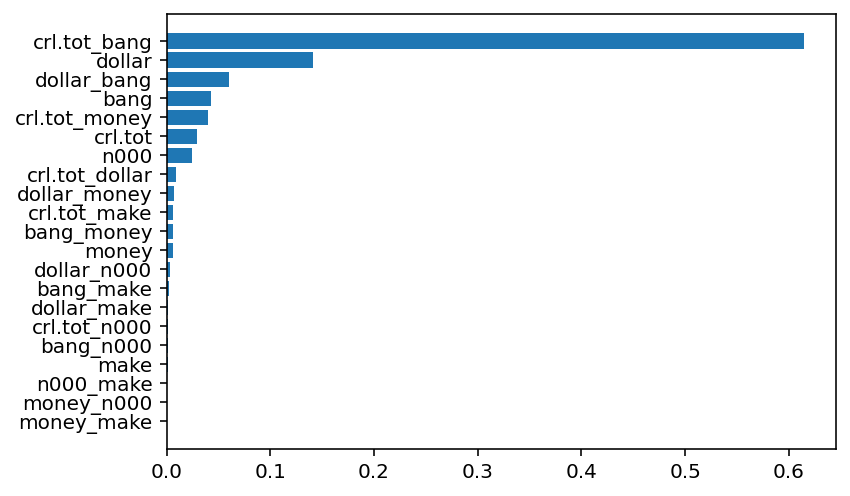

In [17]:
plt.barh(importances.index, width = importances);

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}

clf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   param_grid=param_grid,
                   scoring = 'accuracy',
                   n_jobs=-1,
                   cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [19]:
clf.best_score_

0.8836956521739131

In [20]:
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1250}

In [22]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.749594,0.088512,0.003192,0.000399,0.00001,100,"{'learning_rate': 1e-05, 'n_estimators': 100}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
1,1.330441,0.119158,0.004588,0.000489,0.00001,250,"{'learning_rate': 1e-05, 'n_estimators': 250}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
2,2.235623,0.011675,0.006782,0.000747,0.00001,500,"{'learning_rate': 1e-05, 'n_estimators': 500}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
3,3.479896,0.171974,0.008377,0.000489,0.00001,750,"{'learning_rate': 1e-05, 'n_estimators': 750}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
4,4.744316,0.099976,0.011569,0.001017,0.00001,1000,"{'learning_rate': 1e-05, 'n_estimators': 1000}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
5,5.854149,0.055167,0.013165,0.000747,0.00001,1250,"{'learning_rate': 1e-05, 'n_estimators': 1250}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
6,6.910325,0.062416,0.016556,0.003764,0.00001,1500,"{'learning_rate': 1e-05, 'n_estimators': 1500}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
7,8.040503,0.049050,0.017952,0.001262,0.00001,1750,"{'learning_rate': 1e-05, 'n_estimators': 1750}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
8,0.457775,0.006401,0.003391,0.000488,0.0001,100,"{'learning_rate': 0.0001, 'n_estimators': 100}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32
9,1.150723,0.011448,0.004388,0.000488,0.0001,250,"{'learning_rate': 0.0001, 'n_estimators': 250}",0.612772,0.612772,0.612772,0.614130,0.614130,0.613315,0.000666,32


In [26]:
param_grid = {'max_depth':np.arange(5,16)}

clf = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                        n_estimators=1250,                                                        
                                                        random_state=42),
                   param_grid=param_grid,
                   scoring = 'accuracy',
                   n_jobs=-1,
                   cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  n_estimators=1250,
                                                  random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='accuracy')

In [30]:
clf.best_params_

{'max_depth': 5}

In [29]:
clf.best_score_

0.8853260869565217

In [39]:
N = len(y)
sample_weight = np.ones(N) / N

estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
estimator.fit(X, y, sample_weight=sample_weight)
y_predict = estimator.predict(X)

incorrect = (y_predict != y)

(sample_weight*incorrect).sum()

0.17713540534666378

In [40]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list,\
    estimator_weight_list, sample_weight_list = [], [], [], [], []

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        estimator_error = sample_weight[incorrect].sum() 
        
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate*np.log((1-estimator_error)/estimator_error)

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight*incorrect*((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

Accuracy =  0.8228645946533363
